# Credit Card Fraud Detector

**Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1. Problem Statement

This project aims to analyze credit card transactions and identify fraudulent transactions.
The dataset contains transaction features and a target variable `Class` where:

- 0 = Legitimate transaction
- 1 = Fraudulent transaction

Goal: Understand data distribution, imbalance, and important patterns before model training.

## 2. Data Collection

Dataset Source:
https://www.kaggle.com/datasets/ahmedjawed/creditscardfrauddataset

The dataset contains transaction records with numerical features (V1–V28), Amount, Time, and Class.

# 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [4]:
df = pd.read_csv('data/creditcard.csv')

**Show Top 5 Rows**

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Shape of the DataSet**

In [6]:
df.shape


(284807, 31)

## Dataset Information

- Time: Seconds elapsed between transactions
- V1 - V28: Anonymized PCA features
- Amount: Transaction amount
- **Class: Target label (1 = fraud, 0 = non-fraud)**


## Data Checks to Perform
- Check missing values
- Check duplicates
- Check data types
- Check number of unique values of each column
- Check class distribution
- Check statistical summary


## 3.1 Check Missing values

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(1081)

# Found 1081 duplicated rows

## Remove the duplicates

In [9]:
df = df.drop_duplicates()

Checking Dulpicates After Removal

In [10]:
df.duplicated().sum()

np.int64(0)

# 3.3 Check data types

In [11]:
df.info()

<class 'pandas.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 non-null  f

# 3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

# 3.5 Check the statistics of data set

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# Insight


- Features V1–V28 have mean = 0 and std = 1, showing they are PCA-transformed and standardized.
- Some features (e.g., V5, V7, V27) show extreme min/max values, indicating possible outliers.
- Amount has a wide range and appears highly skewed.
- Class mean is close to 0, confirming strong class imbalance (fraud cases are rare)..

# 3.7 Exploring Data

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
categorical_col = df.select_dtypes(include="object").columns
for col in categorical_col:
    
    print()

print(categorical_col)



Index([], dtype='str')


In [15]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

# The dataset is highly imbalanced: non-fraud transactions (Class 0) are much more than fraud transactions (Class 1).


In [16]:
df['Class'].value_counts(normalize=True) * 100

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

## Non-fraud(0) and Fraud Transactions(1): In Percentage form 

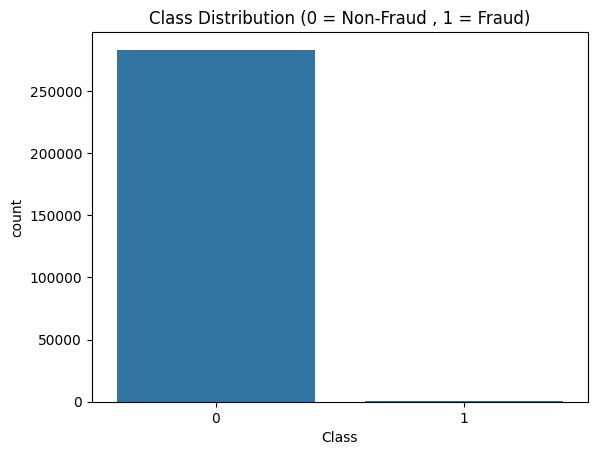

In [17]:
sns.countplot(x='Class',data=df)
plt.title("Class Distribution (0 = Non-Fraud , 1 = Fraud)")
plt.show()

## Making Fraud Cases More Visible Using Log Scale on the Y-Axis
 - **Class Distrubution Now using Log Scale**

In [ ]:
ax = sns.countplot(x='Class',data=df)
ax.set_yscale("log")
plt.title("Class Distribution (0 = Non-Fraud , 1 = Fraud)")
plt.show()

## **Visualizeing the distribution of transaction amounts for each Fraud(1) Vs Non_Fraud(0)  using a log scale.**


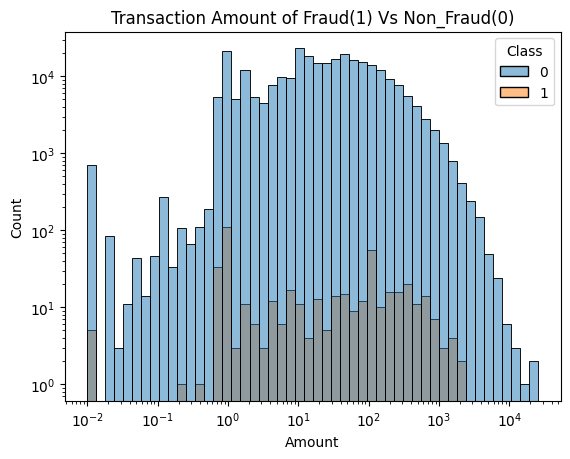

In [53]:
ax = sns.histplot(data=df, x='Amount', hue='Class', bins=50, log_scale=True)
ax.set_yscale("log")
plt.title("Transaction Amount of Fraud(1) Vs Non_Fraud(0)")
plt.show()

## Analyzing Transaction Amount by Class

## **Calculating the summary statistics of transaction amounts for each class to compare their distributions.**


In [20]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


## **Transaction amounts are highly skewed, with most values concentrated at low amounts and a few very large outliers.**


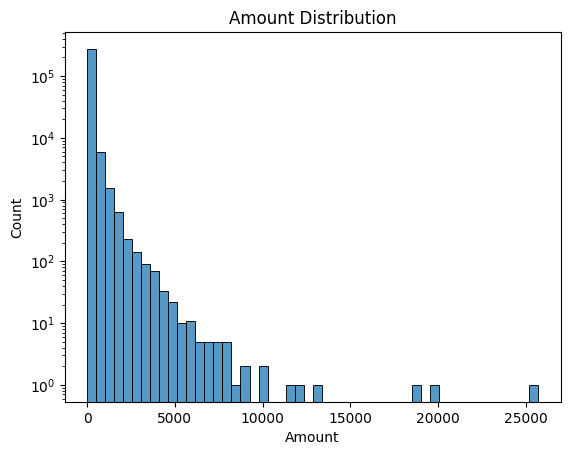

In [52]:
ax = sns.histplot(df['Amount'] , bins=50)
ax.set_yscale("log")
plt.title("Amount Distribution")
plt.show()

## **Transactions distributed over time across the dataset** 

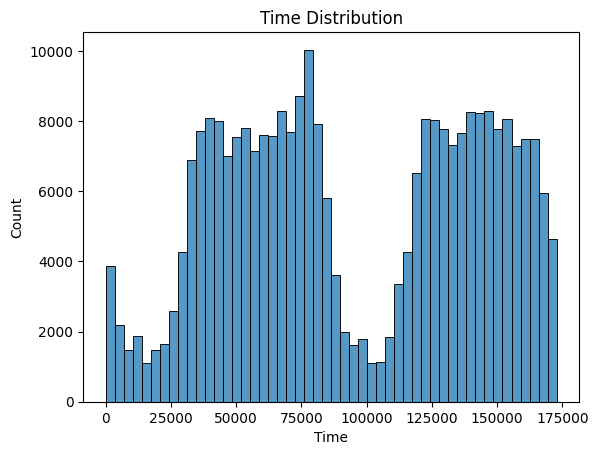

In [ ]:
ax = sns.histplot(df['Time'], bins=50)
plt.title("Time Distribution")
plt.show()